#### **Introduction**

In this project, I use linear regression to explore the relationship between BMI, age, and the average number of positive risk factors for metabolic syndrome. By analyzing the slopes and R2 values from the regression models, I will  determine how strongly BMI and age (Age vs. BMI) influence the number of risk factors. 

Linear regression models the relationship between a dependent variable (y) and independent variables (x) using a linear equation. The interpretation of the slopes (β) from the linear regression models provides valuable insight into how much the average number of risk factors changes with a one-unit increase in either BMI or age. A positive slope indicates that an increase in the independent variable, whether BMI or age, is associated with an increase in the number of risk factors, while a negative slope would suggest a decrease.

The coefficient of determination, R², measures the proportion of variance in the dependent variable explained by the independent variables. This metric offers an indicator of how well the independent variable (BMI or age) predicts the number of risk factors. The interpretation of R² values ranges as follows: a low R² (0-0.3) indicates a weak relationship where BMI or age explains little of the variability in the number of risk factors; a moderate R² (0.3-0.6) suggests a fair amount of the variability is explained; a high R² (0.6-0.9) represents a strong relationship where most of the variability is explained; and a very high R² (0.9-1.0) indicates an extremely strong relationship, with BMI or age almost entirely predicting the number of risk factors.

By analyzing the slopes and R² values from the regression models, I will assess how strongly BMI and age influence the average number of positive risk factors for metabolic syndrome. The results of this analysis will help determine which factor, BMI or age, has a more significant impact on the risk profile and may provide insights into targeted interventions for reducing the prevalence of metabolic syndrome.

The slope and R² are both important metrics in linear regression analysis, but they provide different insights and serve distinct purposes. The slope represents the rate of change in the dependent variable, which in this case is the average number of positive risk factors for metabolic syndrome.  It tells us how much the dependent variable is expected to increase or decrease when the independent variable increases by one unit. A positive slope indicates that as the independent variable increases, the dependent variable also increases, while a negative slope suggests a decrease in the dependent variable as the independent variable increases. The slope thus offers direct insight into the nature and magnitude of the relationship between the variables.

In contrast, R², the coefficient of determination, measures the proportion of variance in the dependent variable that is explained by the independent variable(s) in the model. It provides an overall indication of how well the independent variable(s) account for the variability in the dependent variable.  Unlike the slope, R² does not give information about the direction or magnitude of the relationship but rather assesses the strength and explanatory power of the model as a whole.

The key difference lies in the type of information each metric provides: the slope focuses on the magnitude of the relationship, showing how changes in the independent variable affect the dependent variable, while R² evaluates the strength of the model, indicating how well the independent variable(s) predict the dependent variable. In summary, while the slope gives a detailed understanding of the relationship between specific variables, R² offers a broader assessment of how well the model captures the overall variability in the data. Both metrics are essential for interpreting the results of a regression analysis but serve different interpretative purposes.

The dataset used in this analysis, 'df_adult_updated.csv,' is a novel synthetic representation of the US adult population, designed to reflect realistic distributions of age and BMI. It includes metabolic health metrics that simulate real-world data. It achieves  a calculated 34.58% prevalence of metabolic syndrome, closely matching national estimates. Full analysis of this dataset can be found at: https://github.com/Compcode1/synthetic-metabolic-dataset

The coding approach in this project utilizes PostgreSQL for database management, where we created and managed tables to store and analyze the data. We used Python with the psycopg2 library to interface with the PostgreSQL database, allowing us to execute SQL commands directly from Python scripts. The analysis involves creating tables, inserting data, and running complex queries to calculate average risk factors by BMI and age.

We also implemented user management within the PostgreSQL environment by creating roles with different levels of access. Specifically, we created a read-only user who can view data without making changes and a read-write user who has permissions to both view and modify data. This approach ensures data security and integrity while allowing different types of access based on user roles.

#### **Establishing a Connection to the PostgreSQL Database**


In this section of the project, I establish a connection to the PostgreSQL database df_adult_project using Python's psycopg2 library. This code initializes the connection by specifying the database name, user credentials, and host information. Once the connection is established, a cursor object is created to facilitate interaction with the database. To verify that the connection has been successfully made, a simple SQL query is executed to retrieve the PostgreSQL version. The version information is then printed to confirm that the database is accessible and operational. After the query execution, both the cursor and the connection are closed to ensure that resources are properly released. This setup forms the foundation for all subsequent database operations within the project.







In [1]:
import psycopg2

# Connect to the existing 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",  # Use the name of your existing database
    user="postgres",
    password="",
    host="localhost"
)

# Create a cursor object
cur = conn.cursor()

# Test the connection with a simple query
cur.execute("SELECT version();")
version = cur.fetchone()
print(version)

# Close the cursor and connection
cur.close()
conn.close()


('PostgreSQL 14.13 (Homebrew) on aarch64-apple-darwin23.4.0, compiled by Apple clang version 15.0.0 (clang-1500.3.9.4), 64-bit',)


#### **Loading and Verifying the Dataset**

In this section, I load the dataset df_adult_updated.csv into a Pandas DataFrame to facilitate data manipulation and analysis. Using the pd.read_csv function, we read the CSV file from the specified path and store the data in the variable df. Once the dataset is loaded, the head() function is used to display the first few rows, allowing us to verify that the data has been loaded correctly. The output includes various health-related metrics such as age, gender, BMI, waist circumference, fasting blood glucose, and several derived risk factors. These initial rows confirm that the dataset has been successfully imported and that the key variables needed for subsequent analysis are present and accurately represented. This step ensures that the data is ready for further exploration and analysis within the project.








In [2]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('/Users/steventuschman/Desktop/df_adult_updated.csv')

# Display the first few rows to verify
print(df.head())


   Age  Gender   BMI  Waist_Circumference  Fasting_Blood_Glucose BMI_Category  \
0   30  Female  24.9                 27.0                     97       Normal   
1   24    Male  28.0                 33.1                     82   Overweight   
2   79    Male  30.9                 54.6                    136        Obese   
3   75    Male  32.4                 57.2                    296        Obese   
4   65    Male  34.2                 50.4                     73        Obese   

   Triglycerides  HDL_Cholesterol  High_Blood_Pressure  Metabolic_Syndrome  \
0            139               36                    0               False   
1             52               42                    0               False   
2            268               58                    0                True   
3            181               56                    1                True   
4            128               58                    1               False   

   Risk_Factors  BMI_Rounded  Age_Rounded  C

#### **Converting Columns to Boolean Data Type**


In this step, I convert the 'High_Blood_Pressure' and 'Metabolic_Syndrome' columns in the DataFrame to a Boolean data type. This conversion is essential because these columns represent binary outcomes, where the values indicate the presence (True) or absence (False) of specific health conditions. By using the astype(bool) method, we ensure that these columns are accurately represented as Boolean values, which can improve the efficiency and clarity of subsequent data analysis and processing. This step is crucial for ensuring that the data is in the correct format for logical operations and statistical analysis that will follow.

In [3]:
# Convert the 'High_Blood_Pressure' and 'Metabolic_Syndrome' columns to Boolean
df['High_Blood_Pressure'] = df['High_Blood_Pressure'].astype(bool)
df['Metabolic_Syndrome'] = df['Metabolic_Syndrome'].astype(bool)


#### **Creating the health_metrics Table in PostgreSQL**


In this section, I establish a connection to the df_adult_project PostgreSQL database and create the health_metrics table, ensuring that it is structured with appropriate data types and constraints. Using the psycopg2 library, we connect to the database and create a cursor object to execute SQL commands.

The CREATE TABLE statement is used to define the health_metrics table. This table includes several columns, each representing a specific health metric or demographic information. The columns are assigned appropriate data types, such as INT for integer values, VARCHAR for string data, and BOOLEAN for binary values. The id column is set as the primary key with the SERIAL data type, which automatically generates unique identifiers for each row.

Once the table structure is defined, the changes are committed to the database using the commit function. The cursor and connection are then closed to ensure that resources are properly released. A message is printed to confirm that the table has been created successfully. This step is crucial for setting up the database schema, allowing for the organized storage of health-related data that will be used in subsequent analysis.

In [4]:
import psycopg2

# Connect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Create the 'health_metrics' table with appropriate data types and constraints
cur.execute("""
CREATE TABLE IF NOT EXISTS health_metrics (
    id SERIAL PRIMARY KEY,
    age INT NOT NULL,
    gender VARCHAR(10) NOT NULL,
    bmi NUMERIC NOT NULL,
    waist_circumference NUMERIC,
    fasting_blood_glucose INT,
    bmi_category VARCHAR(20),
    triglycerides INT,
    hdl_cholesterol INT,
    high_blood_pressure BOOLEAN,
    metabolic_syndrome BOOLEAN,
    risk_factors INT,
    bmi_rounded NUMERIC,
    age_rounded INT,
    calculated_metabolic_syndrome BOOLEAN,
    health_risk_score INT,
    risk_category VARCHAR(20),
    converted_risk_score INT
);
""")

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Table created successfully.")


Table created successfully.


#### **Inserting Data from DataFrame into the health_metrics Table in PostgreSQL**


In this section, I reconnect to the df_adult_project PostgreSQL database and proceed to insert data from the Pandas DataFrame into the health_metrics table. Using the psycopg2 library, we establish the connection and create a cursor object to execute SQL commands.

The process involves iterating over each row in the DataFrame and executing an SQL INSERT statement for each entry. This statement maps the DataFrame columns, such as Age, Gender, BMI, and various health-related metrics, to the corresponding columns in the health_metrics table. The data is inserted row by row into the table using the execute method of the cursor.

After all rows have been inserted, the commit function is called to save the changes to the database. Finally, the cursor and connection are closed to properly release the resources. A message is printed to indicate that the data has been successfully inserted. This step is critical for populating the database with the relevant health metrics data, making it available for further analysis and querying within the project.

In [5]:
import psycopg2

# Reconnect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Insert data from DataFrame into PostgreSQL
for index, row in df.iterrows():
    cur.execute("""
    INSERT INTO health_metrics (
        age, gender, bmi, waist_circumference, fasting_blood_glucose, bmi_category,
        triglycerides, hdl_cholesterol, high_blood_pressure, metabolic_syndrome,
        risk_factors, bmi_rounded, age_rounded, calculated_metabolic_syndrome,
        health_risk_score, risk_category, converted_risk_score
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)""",
    (
        row['Age'], row['Gender'], row['BMI'], row['Waist_Circumference'], row['Fasting_Blood_Glucose'],
        row['BMI_Category'], row['Triglycerides'], row['HDL_Cholesterol'], row['High_Blood_Pressure'],
        row['Metabolic_Syndrome'], row['Risk_Factors'], row['BMI_Rounded'], row['Age_Rounded'],
        row['Calculated_Metabolic_Syndrome'], row['Health_Risk_Score'], row['Risk_Category'], row['Converted_Risk_Score']
    ))

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Data inserted successfully.")


Data inserted successfully.


#### **Creating and Managing User Roles in PostgreSQL**


In this section, I establish a connection to the df_adult_project PostgreSQL database as the postgres user to manage user roles. Using the psycopg2 library, I connect to the database and create a cursor object to execute SQL commands.

The code checks whether two specific user roles, readonly_user and readwrite_user, already exist in the database. If these roles do not exist, they are created with the CREATE ROLE SQL command. The readonly_user is intended for users who require access to view data without making any modifications, while the readwrite_user is for users who need both read and write access.

The role existence is verified using a SELECT query on the pg_roles system catalog. If the role is found, a message is printed indicating that the role already exists; otherwise, the role is created and a confirmation message is printed.

After the roles are checked and created, the changes are committed to the database using the commit function. The cursor and connection are then closed to ensure that resources are properly released. This step is crucial for setting up user management within the PostgreSQL environment, allowing for controlled access to the database based on user roles.

In [6]:
import psycopg2

# Connect to the 'df_adult_project' database as the 'postgres' user
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",  # No password set
    host="localhost"
)
cur = conn.cursor()

# Check if 'readonly_user' exists, and create it if it doesn't
cur.execute("SELECT 1 FROM pg_roles WHERE rolname='readonly_user'")
if not cur.fetchone():
    cur.execute("CREATE ROLE readonly_user WITH LOGIN;")
    print("readonly_user created successfully.")
else:
    print("readonly_user already exists.")

# Check if 'readwrite_user' exists, and create it if it doesn't
cur.execute("SELECT 1 FROM pg_roles WHERE rolname='readwrite_user'")
if not cur.fetchone():
    cur.execute("CREATE ROLE readwrite_user WITH LOGIN;")
    print("readwrite_user created successfully.")
else:
    print("readwrite_user already exists.")

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()


readonly_user already exists.
readwrite_user already exists.


#### **Granting Privileges to User Roles in PostgreSQL**


In this section, I connect to the df_adult_project PostgreSQL database as the postgres user to assign specific privileges to the readonly_user and readwrite_user roles. Using the psycopg2 library, I establish the connection and create a cursor object to execute SQL commands.

The code first grants privileges to the readonly_user role. This role is given the ability to connect to the df_adult_project database, use the public schema, and perform SELECT operations on all tables within that schema. This ensures that readonly_user can view data without modifying it.

Next, the code grants privileges to the readwrite_user role. In addition to the privileges granted to readonly_user, readwrite_user is also given the ability to insert, update, and delete data in all tables within the public schema. This role is designed for users who need to both view and modify the data.

After assigning the privileges, the changes are committed to the database using the commit function. The cursor and connection are then closed to properly release the resources. A message is printed to confirm that the privileges have been successfully assigned. This step is essential for enforcing access control in the database, ensuring that each user role has the appropriate level of access based on their responsibilities.








In [7]:
import psycopg2

# Connect to the 'df_adult_project' database as the 'postgres' user
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Grant privileges to readonly_user
cur.execute("GRANT CONNECT ON DATABASE df_adult_project TO readonly_user;")
cur.execute("GRANT USAGE ON SCHEMA public TO readonly_user;")
cur.execute("GRANT SELECT ON ALL TABLES IN SCHEMA public TO readonly_user;")

# Grant privileges to readwrite_user
cur.execute("GRANT CONNECT ON DATABASE df_adult_project TO readwrite_user;")
cur.execute("GRANT USAGE ON SCHEMA public TO readwrite_user;")
cur.execute("GRANT SELECT, INSERT, UPDATE, DELETE ON ALL TABLES IN SCHEMA public TO readwrite_user;")

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Privileges assigned successfully.")


Privileges assigned successfully.


#### **Testing Read-Only Access for readonly_user in PostgreSQL**


In this section, I connect to the df_adult_project PostgreSQL database as the readonly_user to verify that the read-only privileges have been correctly assigned. Using the psycopg2 library, I establish a connection with the readonly_user credentials, which do not require a password in this setup.

Once connected, a cursor object is created to execute SQL commands. To test the read access, a SELECT query is executed to retrieve data from the health_metrics table. The query limits the output to the first 10 rows, ensuring that the operation is efficient and that the data retrieval is successful.

The retrieved rows are then printed to the console, allowing me to visually confirm that the readonly_user can access and view the data. After the test, the cursor and connection are closed to properly release the resources. This step is crucial for validating that the readonly_user role can successfully read data from the database without being able to modify it, confirming that the permissions are correctly enforced.








In [8]:
import psycopg2

# Connect as readonly_user without a password
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="readonly_user",
    password="",  # No password
    host="localhost"
)
cur = conn.cursor()

# Test read access and limit the output to 10 rows
cur.execute("SELECT * FROM health_metrics LIMIT 10;")
rows = cur.fetchall()
for row in rows:
    print(row)

# Close the cursor and connection
cur.close()
conn.close()


(1, 30, 'Female', Decimal('24.9'), Decimal('27.0'), 97, 'Normal', 139, 36, False, False, 1, Decimal('25.0'), 30, False, 2, 'low', 11)
(2, 24, 'Male', Decimal('28.0'), Decimal('33.1'), 82, 'Overweight', 52, 42, False, False, 0, Decimal('28.0'), 24, False, 3, 'low', 17)
(3, 79, 'Male', Decimal('30.9'), Decimal('54.6'), 136, 'Obese', 268, 58, False, True, 3, Decimal('31.0'), 79, True, 9, 'high', 50)
(4, 75, 'Male', Decimal('32.4'), Decimal('57.2'), 296, 'Obese', 181, 56, True, True, 4, Decimal('32.0'), 75, True, 11, 'high', 61)
(5, 65, 'Male', Decimal('34.2'), Decimal('50.4'), 73, 'Obese', 128, 58, True, False, 2, Decimal('34.0'), 65, False, 7, 'moderate', 39)
(6, 51, 'Female', Decimal('30.0'), Decimal('40.4'), 77, 'Obese', 70, 33, True, True, 3, Decimal('30.0'), 51, True, 8, 'moderate', 44)
(7, 18, 'Male', Decimal('22.4'), Decimal('32.9'), 88, 'Normal', 132, 75, True, False, 1, Decimal('22.0'), 18, False, 3, 'low', 17)
(8, 71, 'Female', Decimal('32.1'), Decimal('46.4'), 248, 'Obese', 133

#### **Refreshing the bmi_risk_factors Table in PostgreSQL**


In this section, I connect to the df_adult_project PostgreSQL database as the postgres user to refresh the data in the bmi_risk_factors table. Using the psycopg2 library, we establish a connection and create a cursor object to execute SQL commands.

First, the TRUNCATE command is executed on the bmi_risk_factors table to remove any existing data, effectively resetting the table. This ensures that the table is empty before new data is inserted.

Next, we calculate the average number of risk factors associated with each BMI level. The INSERT INTO command is used to populate the bmi_risk_factors table with this calculated data. The query groups the data by the rounded BMI values from the health_metrics table and computes the average number of risk factors for each group.

After inserting the new data, the changes are committed to the database using the commit function. The cursor and connection are then closed to release the resources. A message is printed to confirm that the table has been successfully truncated and the new data inserted. This step is essential for ensuring that the bmi_risk_factors table contains up-to-date and accurate information based on the current data in the database.








In [11]:
import psycopg2

# Connect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Truncate the bmi_risk_factors table to remove existing data
cur.execute("TRUNCATE TABLE bmi_risk_factors;")

# Calculate and insert the average number of risk factors per BMI level
cur.execute("""
INSERT INTO bmi_risk_factors (bmi, avg_risk_factors)
SELECT bmi_rounded AS bmi, AVG(risk_factors) AS avg_risk_factors
FROM health_metrics
GROUP BY bmi_rounded
ORDER BY bmi_rounded;
""")

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Table truncated, data inserted successfully.")


Table truncated, data inserted successfully.


#### **Retrieving and Displaying Data from the bmi_risk_factors Table in PostgreSQL**


In this section, I connect to the df_adult_project PostgreSQL database as the postgres user to retrieve and display the contents of the bmi_risk_factors table. Using the psycopg2 library, we establish a connection and create a cursor object to execute SQL commands.

The code executes a SELECT * FROM bmi_risk_factors query to fetch all rows from the bmi_risk_factors table. This query retrieves the entire dataset stored in the table, including each BMI level and the corresponding average number of risk factors.

The retrieved rows are then printed to the console, allowing us to view the data directly. After displaying the results, the cursor and connection are closed to properly release the resources. This step is crucial for verifying that the bmi_risk_factors table contains the expected data, providing a clear view of the relationship between BMI levels and associated risk factors as stored in the database.

In [12]:
import psycopg2

# Connect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Retrieve and display the contents of the bmi_risk_factors table
cur.execute("SELECT * FROM bmi_risk_factors;")
rows = cur.fetchall()

# Print the results
for row in rows:
    print(row)

# Close the cursor and connection
cur.close()
conn.close()


(Decimal('15.0'), Decimal('0.72727272727272727273'))
(Decimal('16.0'), Decimal('0.53511053315994798440'))
(Decimal('17.0'), Decimal('0.86120996441281138790'))
(Decimal('18.0'), Decimal('0.72047702152414194299'))
(Decimal('19.0'), Decimal('0.87344068949875255160'))
(Decimal('20.0'), Decimal('0.86316051844466600199'))
(Decimal('21.0'), Decimal('1.00430808027739833981'))
(Decimal('22.0'), Decimal('1.04704510108864696734'))
(Decimal('23.0'), Decimal('1.0357069285174758'))
(Decimal('24.0'), Decimal('1.13539863325740318907'))
(Decimal('25.0'), Decimal('1.4437043615551608'))
(Decimal('26.0'), Decimal('1.7696561583026108'))
(Decimal('27.0'), Decimal('1.9209870174533574'))
(Decimal('28.0'), Decimal('1.9124312564211035'))
(Decimal('29.0'), Decimal('1.9160812892077683'))
(Decimal('30.0'), Decimal('2.3296161057929537'))
(Decimal('31.0'), Decimal('2.5512163892445583'))
(Decimal('32.0'), Decimal('2.6508827941685579'))
(Decimal('33.0'), Decimal('2.6972588940141032'))
(Decimal('34.0'), Decimal('2.7078

#### **Managing the age_risk_factors Table in PostgreSQL**

In this section, I connect to the df_adult_project PostgreSQL database as the postgres user to create, refresh, and populate the age_risk_factors table. The process is handled using the psycopg2 library, which allows us to execute SQL commands within a Python environment.

First, we create the age_risk_factors table if it doesn't already exist. This table will store the age and the corresponding average number of risk factors. The age column is set as the primary key, ensuring that each age level is unique within the table.

Next, we truncate the age_risk_factors table to remove any existing data, clearing the table before inserting new records. This ensures that the table contains only the latest calculated data.

We then calculate the average number of risk factors for each rounded age level using data from the health_metrics table. The calculated averages are inserted into the age_risk_factors table, grouped by age and ordered by the rounded age values.

After the new data is inserted, the changes are committed to the database using the commit function. Finally, the cursor and connection are closed to release the resources. A message is printed to confirm that the table has been successfully created (if needed), truncated, and populated with the new data. This step is essential for analyzing the relationship between age and risk factors, providing insights into how risk factors vary with age.

In [13]:
import psycopg2

# Connect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Create the age_risk_factors table using SQL within Python
cur.execute("""
CREATE TABLE IF NOT EXISTS age_risk_factors (
    age INT PRIMARY KEY,
    avg_risk_factors NUMERIC
);
""")

# Truncate the age_risk_factors table to remove existing data
cur.execute("TRUNCATE TABLE age_risk_factors;")

# Calculate and insert the average number of risk factors per age level
cur.execute("""
INSERT INTO age_risk_factors (age, avg_risk_factors)
SELECT age_rounded AS age, AVG(risk_factors) AS avg_risk_factors
FROM health_metrics
GROUP BY age_rounded
ORDER BY age_rounded;
""")

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Table created, truncated, and data inserted successfully.")


Table created, truncated, and data inserted successfully.


#### **Retrieving and Displaying Data from the age_risk_factors Table in PostgreSQL**


This code connects to the df_adult_project PostgreSQL database to retrieve and display the contents of the age_risk_factors table. Using the psycopg2 library, it establishes a connection to the database and executes SQL queries within a Python environment.

Once connected, the code executes a SELECT query to fetch all rows from the age_risk_factors table. The results of this query, which include the average number of risk factors associated with each age group, are stored in the rows variable.

The code then iterates through the retrieved rows and prints each one, allowing you to see the data directly in the output. This provides a clear view of the relationship between age and average risk factors as stored in the database.

Finally, the cursor and connection are closed to complete the process, ensuring that all resources are properly released. This script is essential for verifying the data in the age_risk_factors table, ensuring that the information has been accurately calculated and stored.#### **

In [15]:
import psycopg2

# Connect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Retrieve and display the contents of the age_risk_factors table
cur.execute("SELECT * FROM age_risk_factors;")
rows = cur.fetchall()

# Print the results
for row in rows:
    print(row)

# Close the cursor and connection
cur.close()
conn.close()


(18, Decimal('1.1538461538461538'))
(19, Decimal('1.1363636363636364'))
(20, Decimal('0.97029702970297029703'))
(21, Decimal('1.1717171717171717'))
(22, Decimal('1.00000000000000000000'))
(23, Decimal('1.0183486238532110'))
(24, Decimal('1.1052631578947368'))
(25, Decimal('1.20886075949367088608'))
(26, Decimal('1.35220125786163522013'))
(27, Decimal('1.24161073825503355705'))
(28, Decimal('1.10119047619047619048'))
(29, Decimal('1.18709677419354838710'))
(30, Decimal('1.27922077922077922078'))
(31, Decimal('1.19774011299435028249'))
(32, Decimal('1.17834394904458598726'))
(33, Decimal('1.26143790849673202614'))
(34, Decimal('1.34183673469387755102'))
(35, Decimal('1.70138888888888888889'))
(36, Decimal('1.47741935483870967742'))
(37, Decimal('1.62068965517241379310'))
(38, Decimal('1.64748201438848920863'))
(39, Decimal('1.75657894736842105263'))
(40, Decimal('1.69032258064516129032'))
(41, Decimal('1.6268656716417910'))
(42, Decimal('1.73758865248226950355'))
(43, Decimal('1.70866141

#### **Visualizing the Average Number of Risk Factors per BMI Level in PostgreSQL**


This code is designed to visualize the relationship between Body Mass Index (BMI) and the average number of risk factors for metabolic syndrome using a bar graph. The process begins by connecting to the df_adult_project PostgreSQL database via the psycopg2 library, which allows the execution of SQL commands within Python.

After establishing a connection, the code retrieves data from the bmi_risk_factors table, specifically the BMI values and their corresponding average number of risk factors. This data is ordered by BMI to ensure the graph is plotted sequentially.

Once the data is fetched, the connection to the database is closed, and the data is prepared for visualization. The BMI values and their corresponding average risk factors are extracted into separate lists for easy plotting.

Using Matplotlib, the code then creates a bar graph that visually represents the average number of risk factors associated with each BMI level. The graph includes labeled axes and a title to clearly convey the relationship being depicted. This visual output is crucial for understanding how BMI correlates with the number of risk factors for metabolic syndrome, offering a clear and interpretable summary of the data stored in the database.

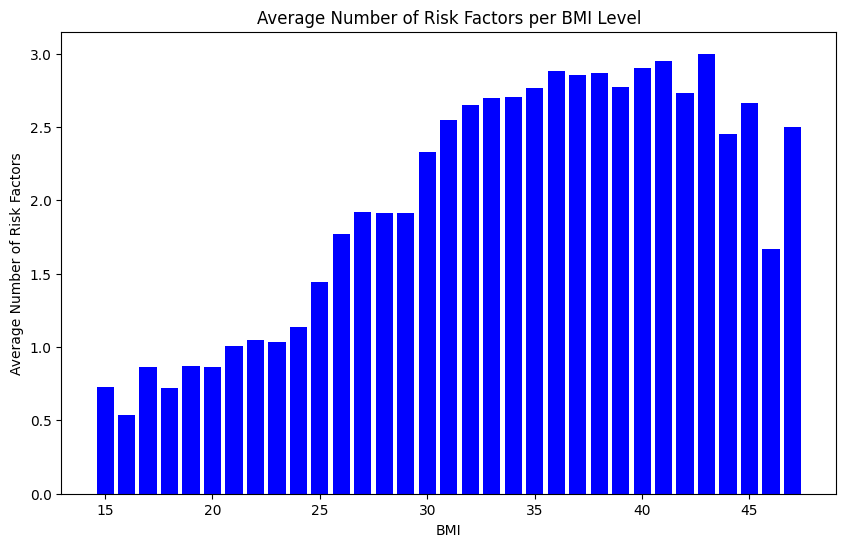

In [16]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Retrieve data from the bmi_risk_factors table
cur.execute("SELECT bmi, avg_risk_factors FROM bmi_risk_factors ORDER BY bmi;")
bmi_data = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Prepare data for plotting
bmi_values = [row[0] for row in bmi_data]
avg_risk_factors = [row[1] for row in bmi_data]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(bmi_values, avg_risk_factors, color='blue')
plt.xlabel('BMI')
plt.ylabel('Average Number of Risk Factors')
plt.title('Average Number of Risk Factors per BMI Level')
plt.show()


#### **Visualizing the Average Number of Risk Factors per Age in PostgreSQL**


This code snippet is used to visualize the relationship between age and the average number of risk factors for metabolic syndrome, with the data stored in a PostgreSQL database. The process starts by establishing a connection to the df_adult_project database using the psycopg2 library.

Once connected, the code retrieves data from the age_risk_factors table, focusing on the age values and their corresponding average number of risk factors. This data is sorted by age to ensure that the bar graph is plotted in the correct sequence.

After retrieving the data, the database connection is closed, and the data is prepared for visualization. The age values and the average risk factors are extracted into separate lists, which are then used to create the bar graph.

Using Matplotlib, the code generates a bar graph that displays the average number of risk factors associated with each age. The graph includes labeled axes and a title, making it easy to interpret the relationship between age and risk factors for metabolic syndrome. This visualization is a key step in analyzing how age influences the number of risk factors, providing a clear and informative summary of the data.

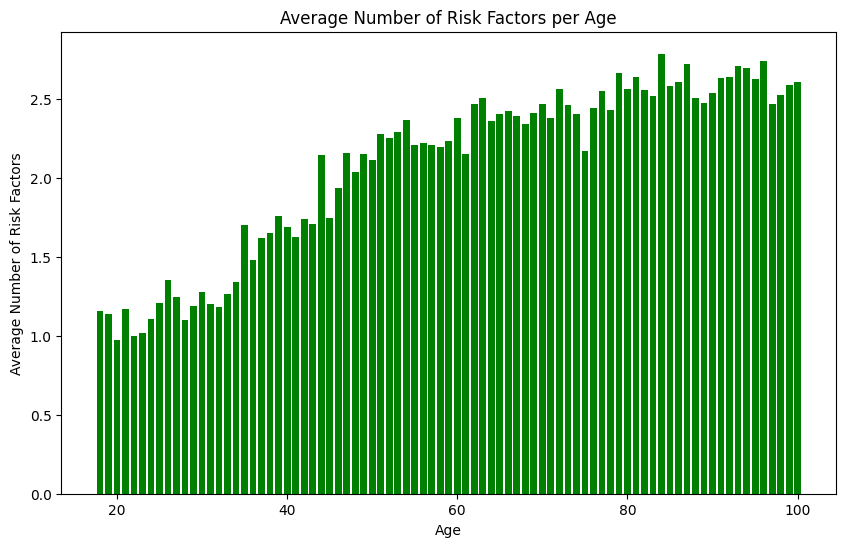

In [17]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Retrieve data from the age_risk_factors table
cur.execute("SELECT age, avg_risk_factors FROM age_risk_factors ORDER BY age;")
age_data = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Prepare data for plotting
age_values = [row[0] for row in age_data]
avg_risk_factors = [row[1] for row in age_data]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(age_values, avg_risk_factors, color='green')
plt.xlabel('Age')
plt.ylabel('Average Number of Risk Factors')
plt.title('Average Number of Risk Factors per Age')
plt.show()


#### **Linear Regression Analysis of BMI and Age vs. Average Risk Factors in PostgreSQL**


This Python script performs a linear regression analysis to compare how BMI and age correlate with the average number of risk factors for metabolic syndrome. The data is sourced from a PostgreSQL database, specifically from the bmi_risk_factors and age_risk_factors tables.

First, the script connects to the df_adult_project database using the psycopg2 library and retrieves the necessary data for BMI and age. The data is then extracted from the database, sorted, and stored in separate arrays for BMI and age along with their corresponding average risk factors.

After closing the database connection, the script prepares the data for regression analysis. Since the data retrieved from the database is in Decimal format, it is converted to float for compatibility with the linregress function from the scipy.stats module.

The script then checks if the data arrays are not empty before performing linear regression on both the BMI and age datasets. The regression analysis calculates the slope, intercept, R-squared value, and other statistics for each relationship, providing insights into the strength and direction of the correlations.

Finally, the script generates scatter plots for both BMI vs. Average Risk Factors and Age vs. Average Risk Factors. These plots include regression lines that visually represent the trends in the data. The regression results and plots help to understand how BMI and age impact the average number of risk factors, offering valuable insights into the factors contributing to metabolic syndrome.

BMI Values: [15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.
 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.]
BMI Risk Factors: [0.72727273 0.53511053 0.86120996 0.72047702 0.87344069 0.86316052
 1.00430808 1.0470451  1.03570693 1.13539863 1.44370436 1.76965616
 1.92098702 1.91243126 1.91608129 2.32961611 2.55121639 2.65088279
 2.69725889 2.7078138  2.76548215 2.88252177 2.85264399 2.86949873
 2.77241848 2.89976038 2.95231608 2.73227207 3.         2.44984802
 2.66666667 1.66666667 2.5       ]
Age Values: [ 18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.
  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.]
Age Risk Factors: [1.15384615 1

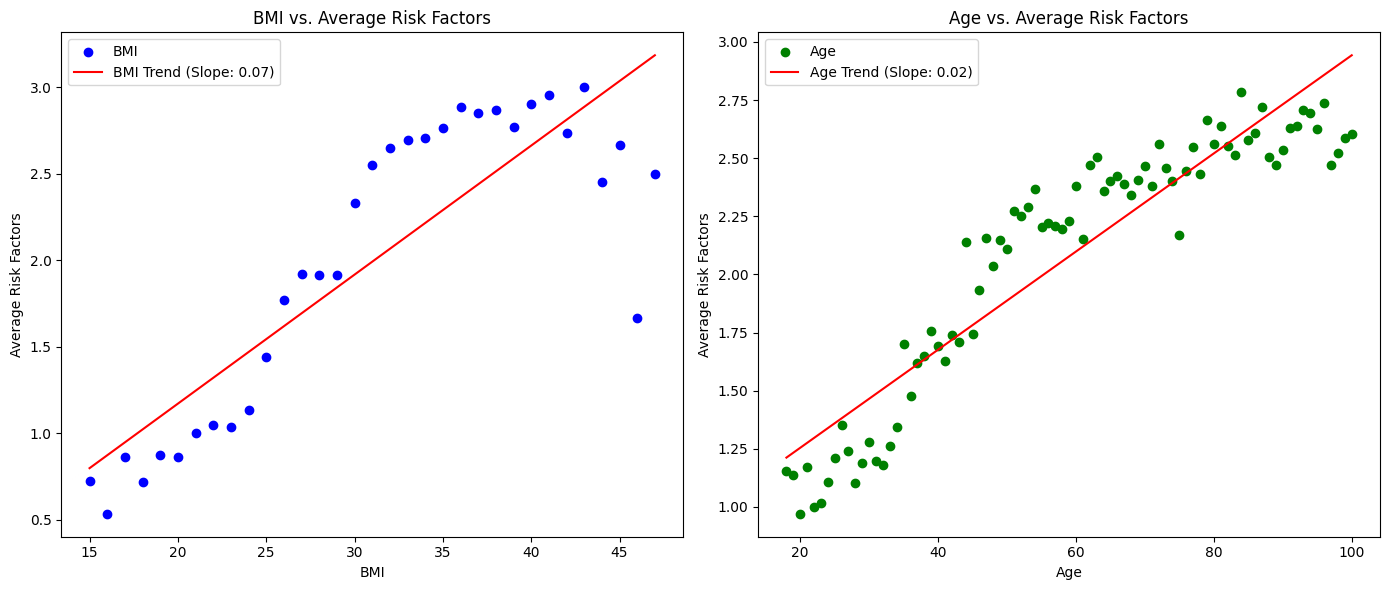

In [18]:
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Connect to the database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Retrieve data for BMI
cur.execute("SELECT bmi, avg_risk_factors FROM bmi_risk_factors ORDER BY bmi;")
bmi_data = cur.fetchall()

# Retrieve data for Age
cur.execute("SELECT age, avg_risk_factors FROM age_risk_factors ORDER BY age;")
age_data = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Prepare data for regression, converting Decimal to float
bmi_values = np.array([float(row[0]) for row in bmi_data])
bmi_risk_factors = np.array([float(row[1]) for row in bmi_data])

age_values = np.array([float(row[0]) for row in age_data])
age_risk_factors = np.array([float(row[1]) for row in age_data])

# Print data for debugging
print("BMI Values:", bmi_values)
print("BMI Risk Factors:", bmi_risk_factors)
print("Age Values:", age_values)
print("Age Risk Factors:", age_risk_factors)

# Ensure that the data arrays are not empty
if bmi_values.size > 0 and age_values.size > 0:
    # Perform linear regression
    slope_bmi, intercept_bmi, r_value_bmi, p_value_bmi, std_err_bmi = linregress(bmi_values, bmi_risk_factors)
    slope_age, intercept_age, r_value_age, p_value_age, std_err_age = linregress(age_values, age_risk_factors)

    print(f"BMI Slope: {slope_bmi}, R-squared: {r_value_bmi**2}")
    print(f"Age Slope: {slope_age}, R-squared: {r_value_age**2}")

    # Plot the data with regression lines
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(bmi_values, bmi_risk_factors, color='blue', label='BMI')
    plt.plot(bmi_values, slope_bmi * bmi_values + intercept_bmi, color='red', label=f'BMI Trend (Slope: {slope_bmi:.2f})')
    plt.xlabel('BMI')
    plt.ylabel('Average Risk Factors')
    plt.title('BMI vs. Average Risk Factors')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(age_values, age_risk_factors, color='green', label='Age')
    plt.plot(age_values, slope_age * age_values + intercept_age, color='red', label=f'Age Trend (Slope: {slope_age:.2f})')
    plt.xlabel('Age')
    plt.ylabel('Average Risk Factors')
    plt.title('Age vs. Average Risk Factors')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("One of the datasets is empty or contains invalid data.")


### **Initial Conclusion**


The analysis offers significant insights into how BMI and age relate to the average number of positive risk factors for metabolic syndrome. The slope for BMI is 0.074, indicating that for each unit increase in BMI, the average number of risk factors rises by approximately 0.074. This suggests that BMI has a relatively strong impact on the number of risk factors, particularly in the short term. Conversely, the slope for age is 0.021, suggesting a smaller increase in risk factors with each additional year of age. Although both BMI and age are influential, BMI appears to have a more immediate effect on the risk factors. 

It is important to note that the R2 value for age is 0.858, higher than the 0.728 for BMI. This indicates that age explains a greater portion of the variance in the average number of risk factors, suggesting a stronger overall relationship between age and these risk factors. This higher R2 value implies that age, despite having a smaller slope, is a more consistent predictor across its wider range, explaining more of the variability in risk factors than BMI does.

It's also crucial to consider the differing scales of age and BMI. Age spans a much broader range than BMI, which could influence the analysis by naturally providing more variability. The broader range of age might contribute to the higher R2, while the narrower range of BMI could result in a steeper slope. This suggests that while BMI has a more pronounced effect in its range, age plays a crucial and consistent role in determining risk factors across a broader spectrum.

In practical terms, this analysis highlights the importance of both managing BMI for its immediate impact on health and considering age as a critical factor over the long term. While BMI is a key factor in the short term, the aging process consistently increases the risk of metabolic syndrome over time. Health strategies should therefore address both BMI management and age-related risk.

#### **Filtering the Dataset for Age Analysis**


In the following code block, I begin by loading the dataset, df_adult_updated.csv.  The dataset is then filtered to exclude individuals aged 85 to 100. This filtering may be  necessary because individuals in this age range often exhibit a high rate of disease and a well-documented inverse relationship between age and BMI. Additionally, upon inspecting the dataset, concerns were raised about potential data skewness or anomalies within this age category, which could impact the accuracy of our analysis. By filtering out these ages, we aim to determine if elimination of these concerns impactfully changes our analysis of the relationship between BMI, age, and the average number of risk factors for metabolic syndrome across the broader adult population.

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/steventuschman/Desktop/df_adult_updated.csv')

# Filter out ages 85-100
df_filtered = df[(df['Age'] < 85)]

# Display the first few rows of the filtered dataset to verify
print(df_filtered.head())


   Age  Gender   BMI  Waist_Circumference  Fasting_Blood_Glucose BMI_Category  \
0   30  Female  24.9                 27.0                     97       Normal   
1   24    Male  28.0                 33.1                     82   Overweight   
2   79    Male  30.9                 54.6                    136        Obese   
3   75    Male  32.4                 57.2                    296        Obese   
4   65    Male  34.2                 50.4                     73        Obese   

   Triglycerides  HDL_Cholesterol  High_Blood_Pressure  Metabolic_Syndrome  \
0            139               36                    0               False   
1             52               42                    0               False   
2            268               58                    0                True   
3            181               56                    1                True   
4            128               58                    1               False   

   Risk_Factors  BMI_Rounded  Age_Rounded  C

#### **Handling Data Type Conversion and Inserting Filtered Data into PostgreSQL**


This code block focuses on ensuring the correct data types are used before inserting the filtered dataset into the PostgreSQL database. First, the 'High_Blood_Pressure' column in the filtered DataFrame is explicitly converted to integers, which is a necessary step before converting it to a boolean type. This conversion is crucial to avoid data type mismatch errors during the database insertion process. After performing these conversions, the code reconnects to the 'df_adult_project' database and inserts the filtered data into the health_metrics table. This step ensures that the data, now accurately reflecting the desired age range (under 85 years), is properly stored for subsequent analysis. The adjustments made to the 'High_Blood_Pressure' column are particularly important for maintaining data integrity and ensuring that boolean values are correctly interpreted in the database.

In [20]:
# First, convert the 'High_Blood_Pressure' column to integers explicitly
df_filtered.loc[:, 'High_Blood_Pressure'] = df_filtered['High_Blood_Pressure'].astype(int)

# Then, convert the 'High_Blood_Pressure' column to BOOLEAN
df_filtered.loc[:, 'High_Blood_Pressure'] = df_filtered['High_Blood_Pressure'].astype(bool)

# Now, try inserting the data again
import psycopg2

# Reconnect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Insert filtered data from DataFrame into PostgreSQL
for index, row in df_filtered.iterrows():
    cur.execute("""
    INSERT INTO health_metrics (
        age, gender, bmi, waist_circumference, fasting_blood_glucose, bmi_category,
        triglycerides, hdl_cholesterol, high_blood_pressure, metabolic_syndrome,
        risk_factors, bmi_rounded, age_rounded, calculated_metabolic_syndrome,
        health_risk_score, risk_category, converted_risk_score
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)""",
    (
        row['Age'], row['Gender'], row['BMI'], row['Waist_Circumference'], row['Fasting_Blood_Glucose'],
        row['BMI_Category'], row['Triglycerides'], row['HDL_Cholesterol'], row['High_Blood_Pressure'],
        row['Metabolic_Syndrome'], row['Risk_Factors'], row['BMI_Rounded'], row['Age_Rounded'],
        row['Calculated_Metabolic_Syndrome'], row['Health_Risk_Score'], row['Risk_Category'], row['Converted_Risk_Score']
    ))

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Filtered data inserted successfully.")


/var/folders/66/jr4_k8xd6rx5c13c4jgcwg200000gn/T/ipykernel_19226/409234126.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ...  True False False]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_filtered.loc[:, 'High_Blood_Pressure'] = df_filtered['High_Blood_Pressure'].astype(bool)


Filtered data inserted successfully.


#### **Recalculating and Inserting Average Risk Factors After Truncating Tables**


This code block is responsible for recalculating and updating the average number of risk factors per BMI and age level in the bmi_risk_factors and age_risk_factors tables, respectively. The process begins by truncating these tables, which removes any existing data, ensuring that the recalculated averages are based on the most current and accurate dataset. The code then calculates the average number of risk factors for each BMI level and each age level, inserting these updated values into their respective tables. Finally, the changes are committed to the database, and the connection is closed. This step is crucial for maintaining the integrity of the dataset, particularly after filtering out specific age ranges, ensuring that all analyses reflect the most relevant data.

In [21]:
import psycopg2

# Connect to the 'df_adult_project' database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Truncate the bmi_risk_factors and age_risk_factors tables to remove existing data
cur.execute("TRUNCATE TABLE bmi_risk_factors;")
cur.execute("TRUNCATE TABLE age_risk_factors;")

# Calculate and insert the average number of risk factors per BMI level
cur.execute("""
INSERT INTO bmi_risk_factors (bmi, avg_risk_factors)
SELECT bmi_rounded AS bmi, AVG(risk_factors) AS avg_risk_factors
FROM health_metrics
GROUP BY bmi_rounded
ORDER BY bmi_rounded;
""")

# Calculate and insert the average number of risk factors per age level
cur.execute("""
INSERT INTO age_risk_factors (age, avg_risk_factors)
SELECT age_rounded AS age, AVG(risk_factors) AS avg_risk_factors
FROM health_metrics
GROUP BY age_rounded
ORDER BY age_rounded;
""")

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()

print("Tables truncated, data recalculated, and inserted successfully.")


Tables truncated, data recalculated, and inserted successfully.


#### **Linear Regression Analysis After Filtering Age Data**


This code block performs a linear regression analysis on the updated dataset after filtering out ages 85 to 100. The objective is to examine the impact of excluding this older age group on the relationship between BMI, age, and the average number of risk factors for metabolic syndrome. The code connects to the df_adult_project database, retrieves the recalculated average risk factors per BMI and age, and then performs linear regression on the filtered data. The results, including the slopes and R-squared values, are printed to provide insight into how BMI and age correlate with the average number of risk factors. Additionally, the code generates scatter plots with regression lines for both BMI and age against the average risk factors, allowing for a visual comparison of the trends in the filtered dataset.

BMI Slope: 0.0745946837438774, R-squared: 0.7310971895331267
Age Slope: 0.021103376289461576, R-squared: 0.8575518779372162


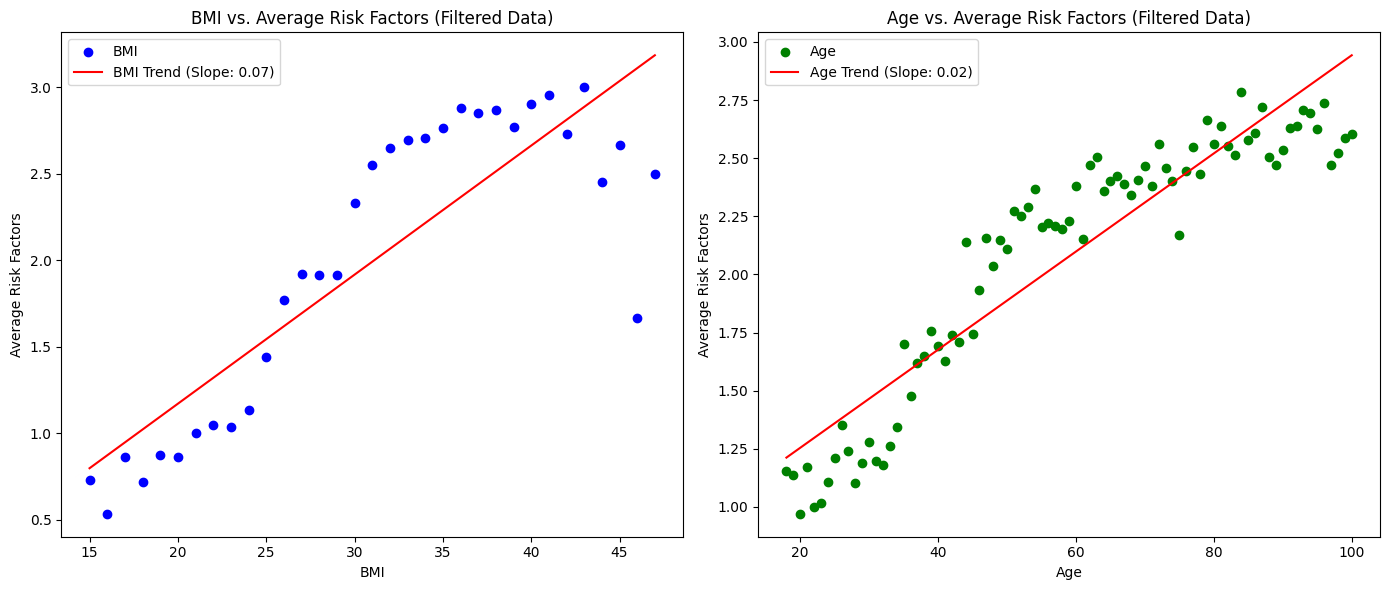

In [22]:
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Connect to the database
conn = psycopg2.connect(
    dbname="df_adult_project",
    user="postgres",
    password="",
    host="localhost"
)
cur = conn.cursor()

# Retrieve updated data for BMI
cur.execute("SELECT bmi, avg_risk_factors FROM bmi_risk_factors ORDER BY bmi;")
bmi_data = cur.fetchall()

# Retrieve updated data for Age
cur.execute("SELECT age, avg_risk_factors FROM age_risk_factors ORDER BY age;")
age_data = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Prepare data for regression, converting Decimal to float
bmi_values = np.array([float(row[0]) for row in bmi_data])
bmi_risk_factors = np.array([float(row[1]) for row in bmi_data])

age_values = np.array([float(row[0]) for row in age_data])
age_risk_factors = np.array([float(row[1]) for row in age_data])

# Perform linear regression
if bmi_values.size > 0 and age_values.size > 0:
    slope_bmi, intercept_bmi, r_value_bmi, p_value_bmi, std_err_bmi = linregress(bmi_values, bmi_risk_factors)
    slope_age, intercept_age, r_value_age, p_value_age, std_err_age = linregress(age_values, age_risk_factors)

    print(f"BMI Slope: {slope_bmi}, R-squared: {r_value_bmi**2}")
    print(f"Age Slope: {slope_age}, R-squared: {r_value_age**2}")

    # Plot the data with regression lines
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(bmi_values, bmi_risk_factors, color='blue', label='BMI')
    plt.plot(bmi_values, slope_bmi * bmi_values + intercept_bmi, color='red', label=f'BMI Trend (Slope: {slope_bmi:.2f})')
    plt.xlabel('BMI')
    plt.ylabel('Average Risk Factors')
    plt.title('BMI vs. Average Risk Factors (Filtered Data)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(age_values, age_risk_factors, color='green', label='Age')
    plt.plot(age_values, slope_age * age_values + intercept_age, color='red', label=f'Age Trend (Slope: {slope_age:.2f})')
    plt.xlabel('Age')
    plt.ylabel('Average Risk Factors')
    plt.title('Age vs. Average Risk Factors (Filtered Data)')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("One of the datasets is empty or contains invalid data.")


#### **Additional Perspective/ Updated Conclusion After Filtering Ages 85-100**
The results of this updated analysis, after filtering out ages 85-100, provide further clarity on the relationship between BMI, age, and the average number of positive risk factors for metabolic syndrome. The slope for BMI remains at 0.074, indicating that each unit increase in BMI results in an approximate increase of 0.074 in the average number of risk factors. This consistency suggests that the impact of BMI on risk factors remains moderate and significant, even after removing the oldest age group from the dataset.

The slope for age has slightly decreased to 0.021, still reflecting a smaller increase in risk factors with each additional year of age. However, the filtering process has not significantly altered the impact of age on risk factors. The R² value for age remains higher at 0.858 compared to 0.728 for BMI, indicating that age still explains a greater portion of the variance in the average number of risk factors. This reinforces the conclusion that age has a stronger overall relationship with risk factors, despite BMI having a more noticeable immediate effect.

In summary, the filtering of older age groups has not led to significant changes in the conclusions drawn from the original analysis. BMI continues to have a moderate and immediate effect on increasing risk factors, while age remains a more consistent predictor across its range, explaining a larger portion of the variance. Therefore, while managing BMI is crucial for immediate impact, age continues to play a critical role over time, reinforcing the need for health strategies that consider both factors in addressing metabolic syndrome.


